In [ ]:
pip install summarytools

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from summarytools import dfSummary


import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, Markdown


sns.set_style("darkgrid")
sns.set(rc={'axes.facecolor':'lightsteelblue', 'figure.facecolor':'white'})

Começaremos nossa analise exploratoria extraindo os dados que pegamos no CO2 emissions (metric tons per capita) - Latin America & Caribbean. [S. l.], 14 fev. 2023. Disponível em: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?end=2020&locations=ZJ&start=1990&view=chart. Para a Previsão de Emissões de CO₂. Que estão contidos no arquivo '/content/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_112.xls'.

In [ ]:
# Define o caminho para o arquivo Excel contendo os dados.
input_dir = '/content/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_112.xls'

# Carrega os dados do arquivo Excel em um DataFrame do pandas.
data = pd.read_excel(input_dir)

# Remove as duas primeiras linhas e redefine os índices do DataFrame.
data = data.drop([0, 1]).reset_index(drop=True)

# Define a primeira linha (após a limpeza) como os novos nomes das colunas.
data.columns = data.iloc[0]

# Remove a primeira linha, agora que ela foi usada para nomear as colunas, e redefine os índices.
data = data.drop(0).reset_index(drop=True)

# Mapeia as colunas que são números com decimais para inteiros, mantendo as colunas de texto intactas.
data.columns = data.columns.map(lambda x: int(x) if isinstance(x, float) else x)

# Remove as colunas que não são necessárias para a análise: 'Country Code', 'Indicator Name' e 'Indicator Code'.
data = data.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

In [ ]:
colunas_a_remover = list(range(1960, 1990)) + [2021, 2022, 2023]
data = data.drop(columns=colunas_a_remover)

In [ ]:
data.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,...,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
2,Afghanistan,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,...,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
3,Africa Western and Central,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,...,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
4,Angola,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,...,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743


In [ ]:
def soma_emissoes_por_pais(data):
    data['Total Emissions'] = data.iloc[:, 4:].sum(axis=1)
    return data

In [ ]:
data = soma_emissoes_por_pais(data)
data.head(5)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Emissions
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,Africa Eastern and Southern,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,...,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,26.887772
2,Afghanistan,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,...,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,4.869834
3,Africa Western and Central,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,...,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,13.511689
4,Angola,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,...,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,25.879278


In [ ]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Country Name[object],1. Aruba2. Oman3. Malawi4. Malaysia5. North America6. Namibia7. New Caledonia8. Niger9. Nigeria10. Nicaragua11. other,1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)256 (96.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",0(0.0%)
2,1990[float64],Mean (sd) : 4.3 (5.4)min < med < max:0.0 < 2.0 < 29.6IQR (CV) : 6.4 (0.8),233 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZ0lEQVR4nO3dvc/SUBiG8efw8VKgtnwY2FgcGEwcGFmcXP1jXd0cYCZhdWIhJISPUF+kVFzQuMhr2xBu4fqt5JQOF3AeIDnudDoZoKJw6xsA/lS69KBzrmpmTxmvfTidTs8Z1+JB/TVI51y13W5/DIKgmeXC2+125Zz7RJRI49I75FMQBM3hcPgchuE+zUU3m403Go2ay+XyycwIEv/s4ke2mVkYhvtOp/Mtw7WrGdbgwTHUQApBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQgpBQsqLZx3eAsciPy65IDkW+bFdLcgkScpmFjjn0i4NfN/vDIfDLcciP56rBBlFUTmO43e9Xq9YLBZTRRXHsZckydtKpfKFY5Efz1WCPBwOJc/zaoPBYN/tdldp1s5ms+Z0Oq0dj8fiNe4N2q66h6zX66kPf1+tVrne4XJsFcwYiG5ObqjJI89WwYyBSMFdBZlnq8BApOGugvwly1bhjIHoxvilBlIIElLu8iM7Kyb02yPIs7wT+nq93jnnPptZ6rVGzL8R5FmeCX0+n78aj8fve73e6xvEXDCzHxnWmeV4IVzrDzAvBrnZbLy0z7bb7TwzsyiKvMViUfuf1mYRx3HJ87xav993jUbje5q16/Xan0wmmWJOkqQcRdEb3/e/FgqFON1d53oheK1W60MYhn7a5zS7/H3vT2b+AhKf1WxpAAAAAElFTkSuQmCC"">",28(10.5%)
3,1991[float64],Mean (sd) : 4.2 (5.4)min < med < max:0.0 < 2.0 < 32.8IQR (CV) : 6.0 (0.8),234 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSUlEQVR4nO3dvY7aQBSG4TOwkOFHtoEsdDQp6FJQ0qfNxeYWkGi5Aoq0CFgZ4UBAhDSslGbZeBDaz/A+LRqb4vVYB4pxp9PJABWlj/4CwL+eLn3onKuZWTXw2vvT6bQNXIsH9WaQzrlap9P5HkVRK+TC6/X6xTn3gyiRx6UdshpFUWs0Gm3jON7luWiapn4ymbSWy2XVzAgS/+3iK9vMLI7jXbfb/RVw7VrAGjw4hhpIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIefesw1DH47FiZpFzLmQ5Rxs/qJsEmWVZ5XA4fO33++VyuZzrJFkzjjZ+ZDcJcr/fP3nv68PhcNfr9V7yrE3T1I/H4+5yufzsnFuH3J6Qi+tmr2wzs0ajkftoY3bXx3bTIENcu7tycHyxyQX5KmR3PePg+ALjZx9Ikd0hQ/FzU7HdVZAMRMV3V0EyEBXfXQX5ioGouBhqIOUud8hQVw5EJTP7E3hrhqkzgjy7ZiA6Ho+VLMu+NJvNWalUOuS9dxGHKedczcyqgcvffADfDTJNU5/3bpvNxpuZZVnm5/N5vQhrV6tV03tfHwwGLkmS33nWLhYLP5vNngeDwc8kSTZ51m6320/T6fT5iv/uP4Jvt9vf4jhuhi

In [ ]:
numeric_cols = data.select_dtypes(include='number').columns

# Calculando a soma por coluna (ano)
row_sums = data[numeric_cols].sum()

# Adicionando uma nova linha com a soma total
total_row = pd.DataFrame(row_sums).T
total_row.index = ['Total']

# Concatenando a nova linha ao DataFrame original
data = pd.concat([data, total_row])

data.tail(5)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Emissions
262,"Yemen, Rep.",0.496616,0.611585,0.632544,0.570608,0.600495,0.654007,0.649987,0.680397,0.707366,...,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515,21.057643
263,South Africa,6.209373,5.922276,5.717823,5.795258,5.826213,6.007616,6.136002,6.372629,6.459824,...,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563,202.490642
264,Zambia,0.356578,0.364978,0.352722,0.304005,0.252979,0.245217,0.197921,0.250242,0.231850,...,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903,7.016855
265,Zimbabwe,1.634929,1.763473,1.735620,1.581818,1.469850,1.408363,1.329556,1.216829,1.218623,...,0.901214,0.901248,0.866838,0.846962,0.723062,0.663069,0.735435,0.663338,0.530484,26.606908
Total,NaN,1016.259076,995.259721,985.743648,973.226353,968.084517,965.788103,982.818769,990.905122,989.090855,...,1055.178953,1047.988256,1027.124466,1011.252780,1006.760413,1007.325368,1006.116824,991.827412,923.912786,28437.391256


In [ ]:
data_teste = data.copy()
data_teste = data_teste.drop('Country Name', axis=1)

# Verificando o resultado
data_teste.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Emissions
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,0.943200,0.962203,0.963157,0.902134,...,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,26.887772
2,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,0.071270,0.058247,...,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,4.869834
3,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,0.554305,0.540062,0.506709,0.502905,...,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,13.511689
4,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,1.091173,1.109791,...,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,25.879278


In [ ]:
dfSummary(data_teste)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,1990[float64],Mean (sd) : 8.5 (65.7)min < med < max:0.0 < 2.0 < 1016.3IQR (CV) : 6.4 (0.1),234 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",28(10.5%)
2,1991[float64],Mean (sd) : 8.3 (64.2)min < med < max:0.0 < 2.0 < 995.3IQR (CV) : 6.1 (0.1),235 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",27(10.1%)
3,1992[float64],Mean (sd) : 8.2 (63.6)min < med < max:0.0 < 2.0 < 985.7IQR (CV) : 6.1 (0.1),240 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",27(10.1%)
4,1993[float64],Mean (sd) : 8.1 (62.8)min < med < max:0.0 < 2.1 < 973.2IQR (CV) : 6.1 (0.1),239 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",27(10.1%)
5,1994[float64],Mean (sd) : 8.1 (62.5)min < med < max:0.0 < 2.0 < 968.1IQR (CV) : 5.9 (0.1),239 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJI

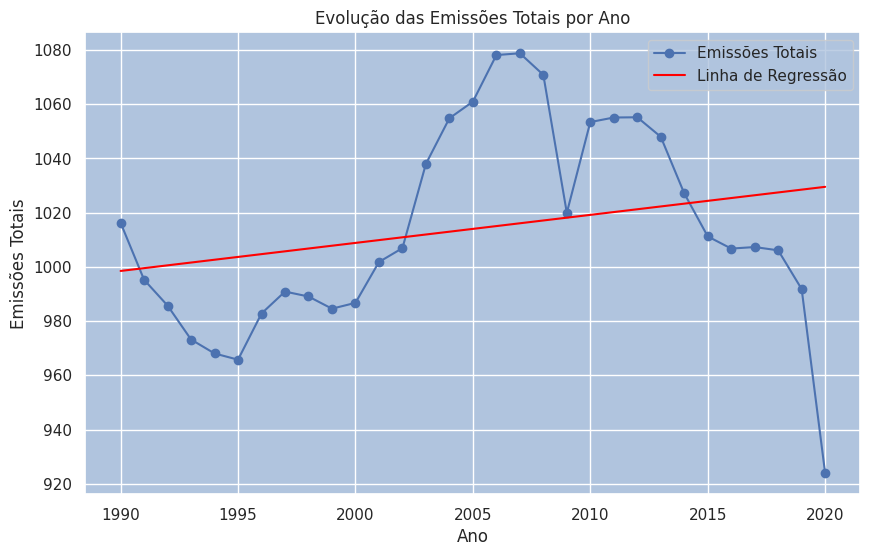

In [ ]:
total_emissions = data_teste.loc['Total']  # Seleciona a linha 'Total'

# Filtrando os valores de emissões apenas para os anos (colunas de 1990 a 2020, removendo 'Total Emissions')
total_emissions_anos = total_emissions.drop('Total Emissions')

# Convertendo os anos (que são as colunas) para inteiros, se necessário
anos = total_emissions_anos.index.astype(int)

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, total_emissions_anos.values, marker='o', label='Emissões Totais')

X = np.array(anos).reshape(-1, 1)  # Convertendo anos para uma matriz 2D
X = sm.add_constant(X)  # Adicionando intercepto
y = total_emissions_anos.values

model = sm.OLS(y, X).fit()

# Fazendo a previsão para todos os anos
predictions = model.predict(X)

# Plotando a linha de regressão
plt.plot(anos, predictions, color='red', label='Linha de Regressão')
# Configurando os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Emissões Totais')
plt.title('Evolução das Emissões Totais por Ano')

# Exibindo a legenda e o grid
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

In [ ]:
paises_america_do_sul = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
    'Ecuador', 'Guyana', 'Paraguay', 'Peru',
    'Suriname', 'Uruguay', 'Venezuela, RB'
]

df_america_do_sul = data[data['Country Name'].isin(paises_america_do_sul)]

df_outros_paises = data[~data['Country Name'].isin(paises_america_do_sul)]

In [ ]:
df_america_do_sul.head(15)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Emissions
9,Argentina,3.073563,3.199038,3.214972,3.240242,3.244828,3.230308,3.462789,3.521298,3.661557,...,4.264111,4.342250,4.209112,4.301914,4.201816,4.070112,3.975651,3.742030,3.405618,105.670222
28,Bolivia,1.466688,1.500078,1.511099,1.359999,1.243221,1.101133,1.042786,1.128868,1.053297,...,1.604682,1.686988,1.784219,1.803674,1.893694,1.891315,1.885188,1.853462,1.539465,37.644109
29,Brazil,1.313132,1.340030,1.333318,1.358611,1.382140,1.475604,1.580454,1.669181,1.698945,...,2.271418,2.413447,2.514592,2.365361,2.161260,2.185487,2.064261,2.050770,1.942523,52.962273
39,Chile,2.288384,2.156284,2.201875,2.319203,2.521119,2.703236,3.071831,3.463043,3.468333,...,4.521603,4.740083,4.328593,4.603236,4.783526,4.743802,4.629657,4.827620,4.395151,106.234779
45,Colombia,1.514181,1.535758,1.567499,1.636872,1.629515,1.669256,1.617503,1.738633,1.714914,...,1.533846,1.680988,1.715821,1.719390,1.753796,1.565075,1.610392,1.577820,1.552259,43.203476
66,Ecuador,1.475870,1.472945,1.543417,1.522776,1.657092,1.809244,2.037983,2.081576,2.005780,...,2.395078,2.525035,2.619452,2.555603,2.420481,2.308764,2.366830,2.285055,1.957575,59.356498
94,Guyana,1.568565,1.537705,1.450608,1.454786,1.885275,2.036214,2.096684,2.280422,2.309511,...,2.689370,2.643226,2.747101,2.754761,3.265238,3.241131,3.293512,3.500331,3.472771,67.704955
186,Peru,0.944195,0.897427,0.912638,0.927167,0.939743,1.049116,1.126665,1.102246,1.044623,...,1.617522,1.656254,1.751594,1.776301,1.826380,1.717243,1.695131,1.735642,1.398566,36.957167
195,Paraguay,0.510495,0.484717,0.578576,0.642378,0.741908,0.821301,0.790168,0.852419,0.866649,...,0.874070,0.882702,0.924029,1.030682,1.147765,1.246325,1.297482,1.240669,1.144591,24.306140
220,Suriname,4.263992,4.917874,4.893753,4.877945,4.851278,4.804670,4.752956,4.706397,4.615980,...,4.374811,4.060328,4.599057,4.733655,5.081900,4.160144,3.615422,4.425813,4.285077,107.161950


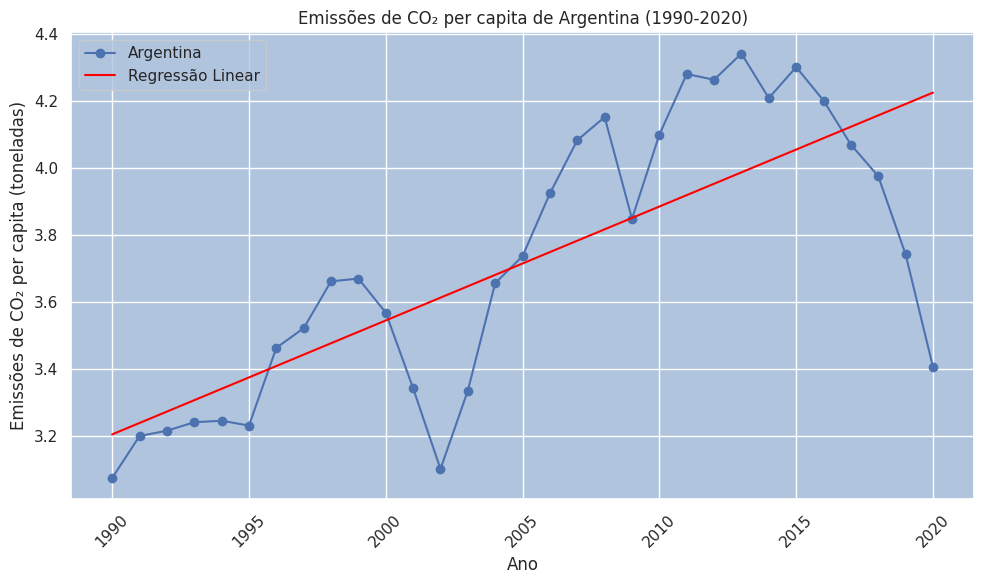

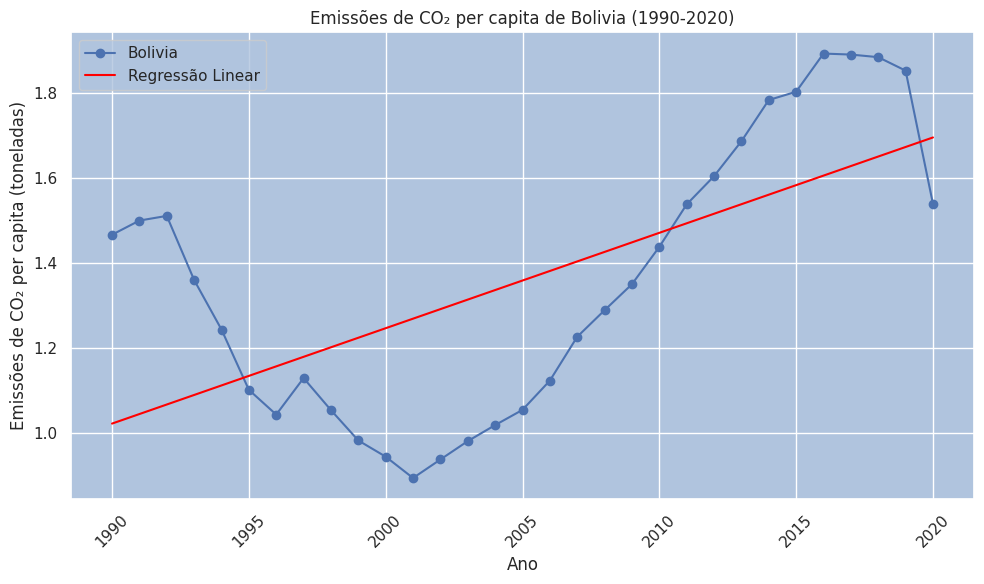

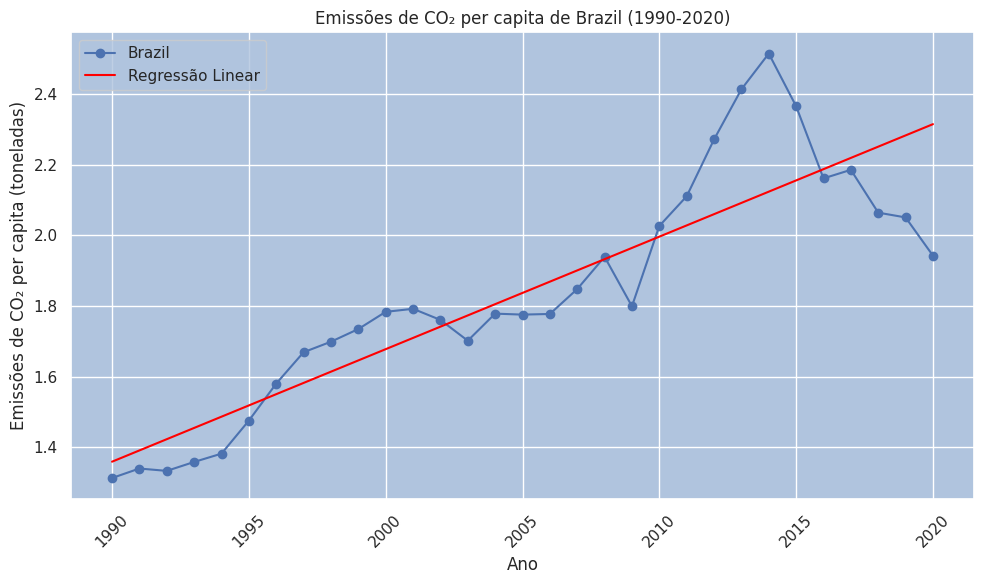

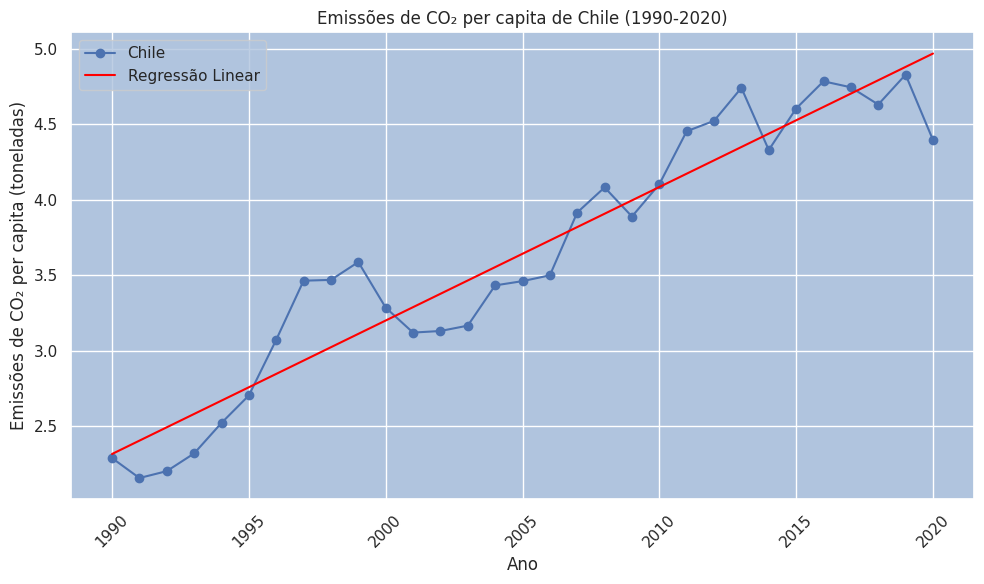

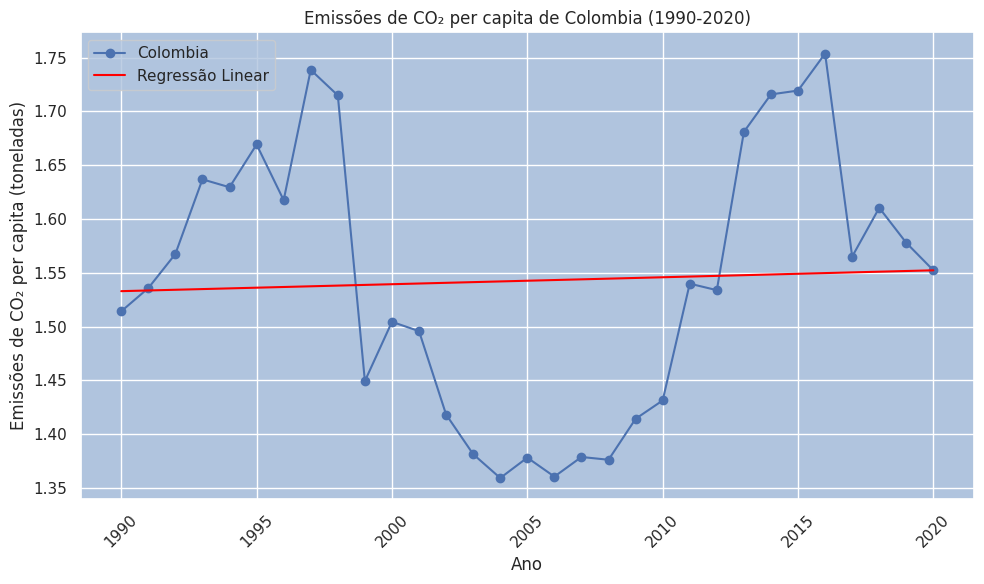

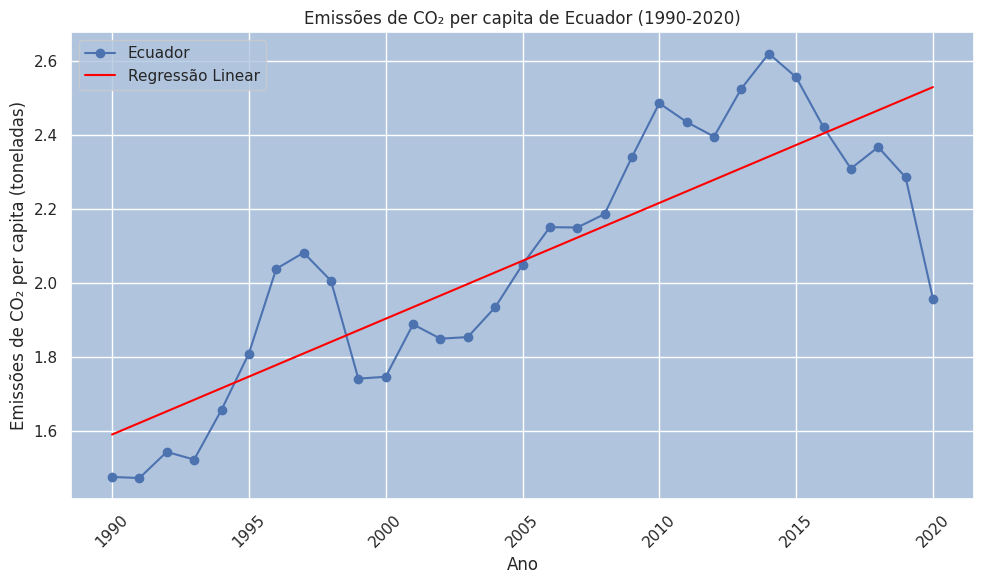

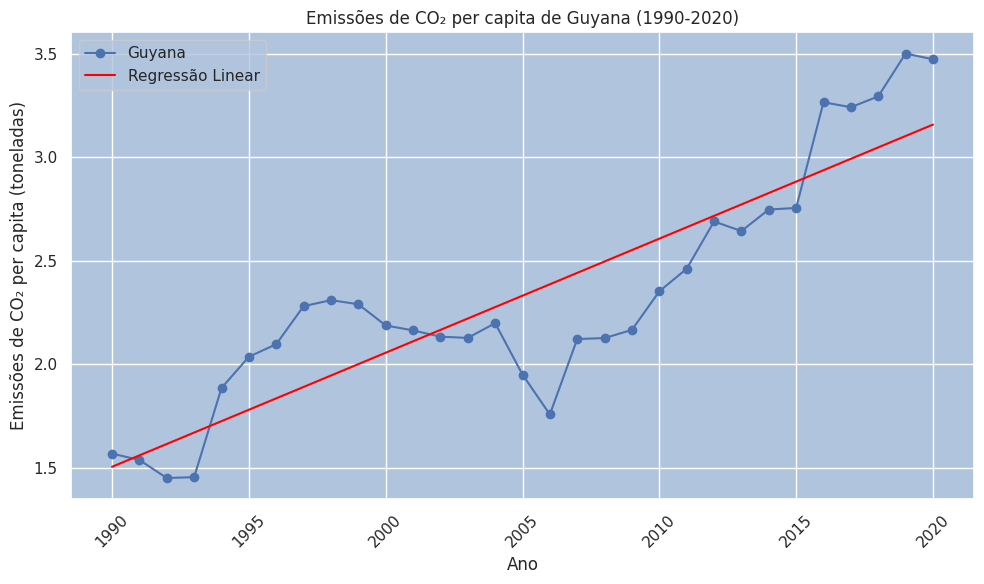

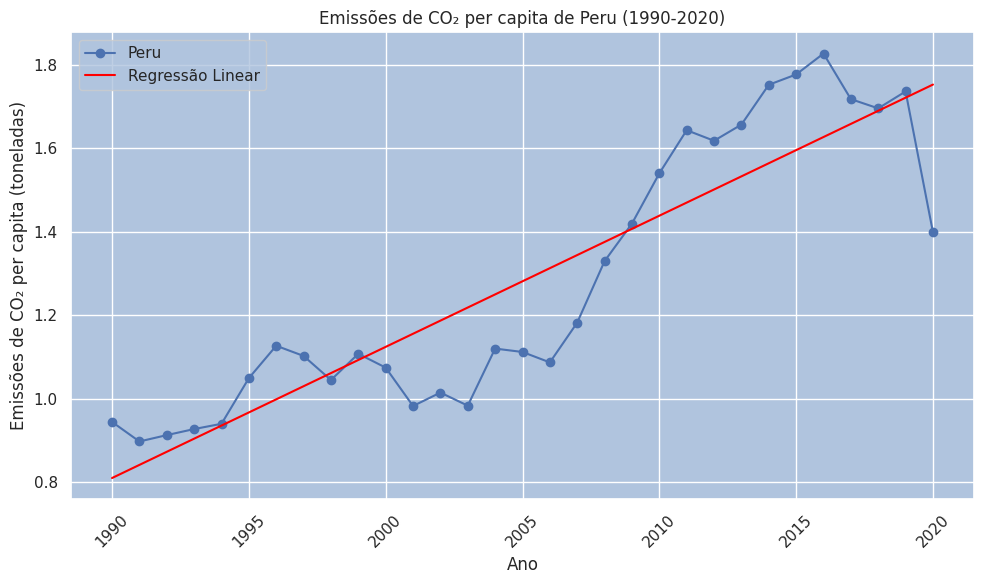

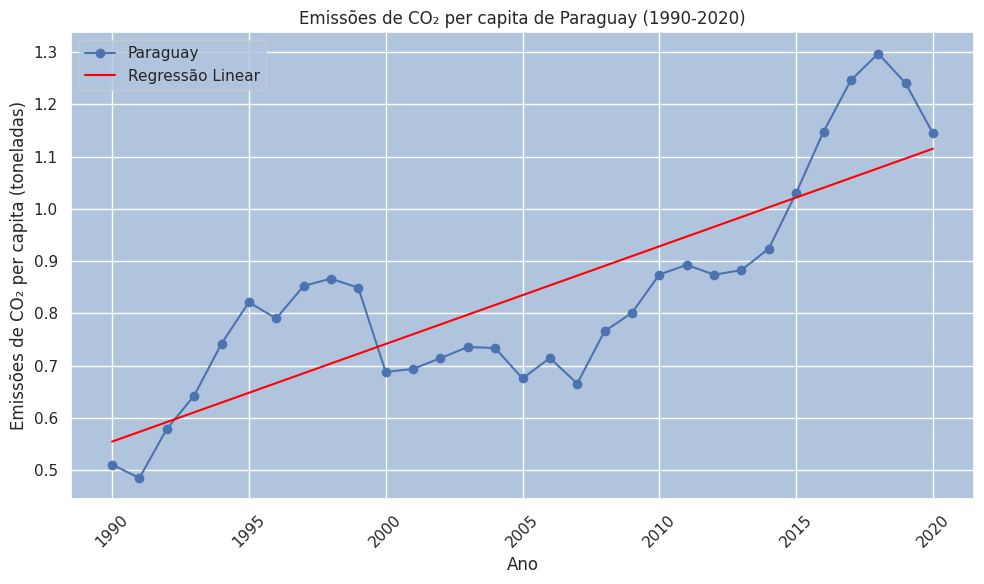

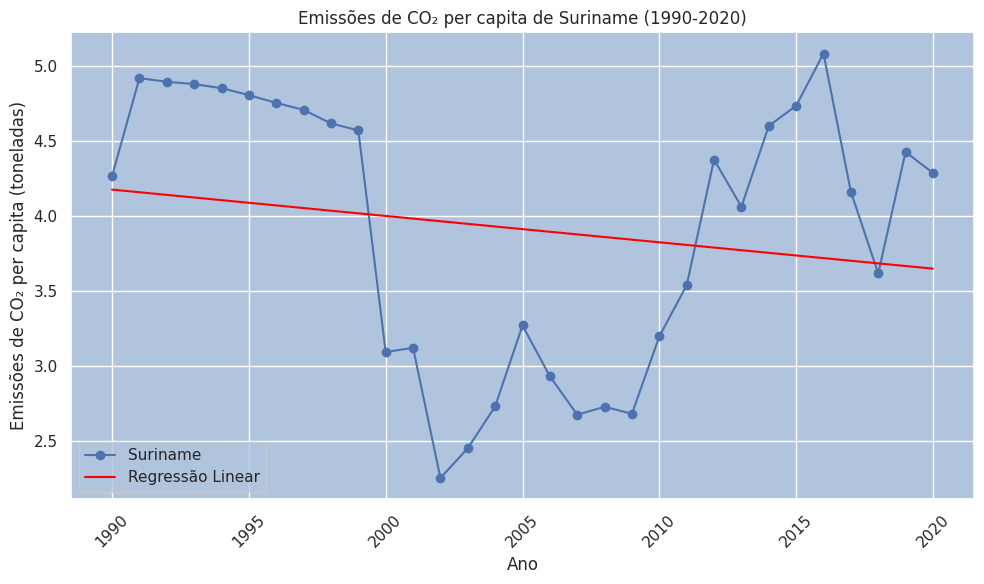

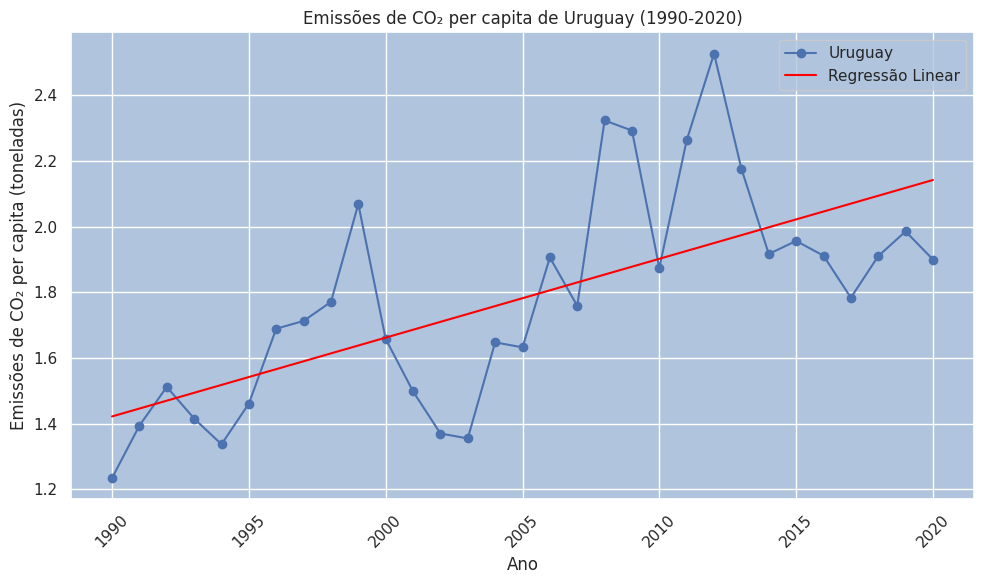

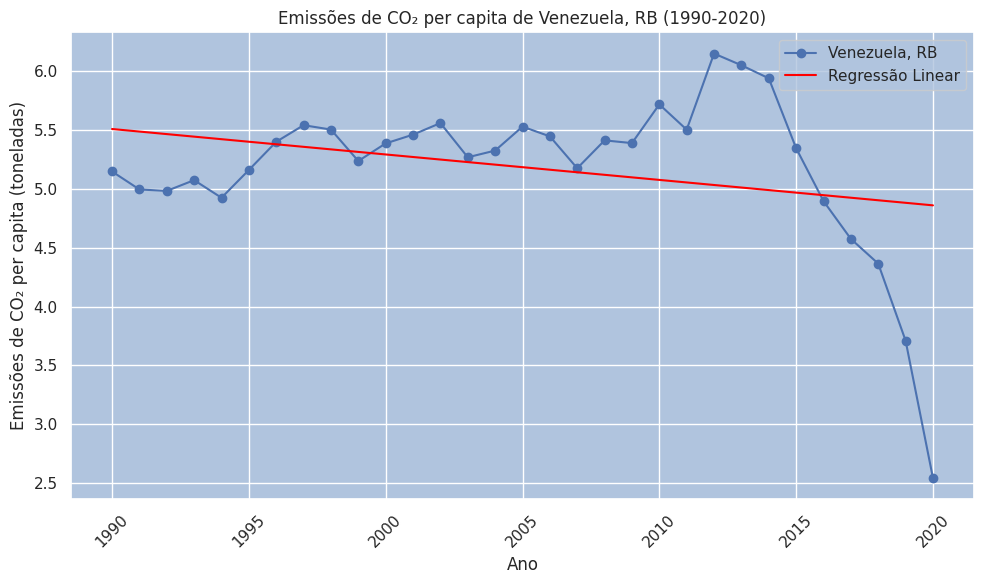

In [ ]:
df_america_do_sul = df_america_do_sul.drop('Total Emissions', axis=1)
def plot_emissoes_todos_paises_salvos(df_america_do_sul):
    paises = df_america_do_sul['Country Name'].unique()

    for pais in paises:
        df_pais = df_america_do_sul[df_america_do_sul['Country Name'] == pais]

        anos = df_pais.columns[1:]
        emissoes = df_pais.iloc[0, 1:].values

        X = sm.add_constant(anos.astype(int))
        y = emissoes
        model = sm.OLS(y, X).fit()

        plt.figure(figsize=(10, 6))
        plt.plot(anos, emissoes, marker='o', color='b', label=pais)
        plt.plot(anos, model.fittedvalues, color='red', label='Regressão Linear')
        plt.title(f'Emissões de CO₂ per capita de {pais} (1990-2020)')
        plt.xlabel('Ano')
        plt.ylabel('Emissões de CO₂ per capita (toneladas)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        plt.savefig(f'emissoes_{pais}.png')

plot_emissoes_todos_paises_salvos(df_america_do_sul)

# EDA DataSet Energia Renovavel

In [ ]:
input_dir_reno = '/content/API_EG.FEC.RNEW.ZS_DS2_en_excel_v2_31813.xls'
data_reno = pd.read_excel(input_dir_reno)
data_reno = data_reno.drop([0, 1]).reset_index(drop=True)
data_reno.columns = data_reno.iloc[0]
data_reno = data_reno.drop(0).reset_index(drop=True)
data_reno.columns = data_reno.columns.map(lambda x: int(x) if isinstance(x, float) else x)
data_reno = data_reno.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
data_reno.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.900000,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,8.8,8.8,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.499577,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.100000,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,20.0,20.0,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.135802,76.689160,76.283383,76.413081,75.960030,75.328928,76.102819,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.500000,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,52.9,NaN,NaN


In [ ]:
data_reno = data_reno.drop(columns=colunas_a_remover)

def soma_emissoes_por_pais(data_reno):
    data_reno['Total Energia Renovavel'] = data_reno.iloc[:, 4:].sum(axis=1)
    return data_reno

data_reno = soma_emissoes_por_pais(data_reno)
data_reno.head(5)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Energia Renovavel
0,Aruba,0.300000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,6.900000,6.900000,6.900000,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,81.900000
1,Africa Eastern and Southern,60.910003,62.183924,63.983020,64.712460,65.207842,64.803352,64.030990,63.295428,64.014146,...,61.718397,61.082685,61.499577,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,1776.143648
2,Afghanistan,23.000000,23.700000,27.400000,28.500000,30.100000,31.800000,33.900000,36.400000,38.000000,...,15.400000,16.900000,19.100000,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,775.700000
3,Africa Western and Central,85.928514,85.318980,83.874799,85.172175,86.608107,86.199544,85.159696,83.910451,84.635228,...,78.886876,77.137941,76.135802,76.689160,76.283383,76.413081,75.960030,75.328928,76.102819,2264.072150
4,Angola,72.300000,71.900000,72.700000,71.300000,72.200000,73.800000,72.900000,73.400000,76.400000,...,49.000000,46.800000,47.500000,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,1716.300000


In [ ]:
dfSummary(data_reno)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Country Name[object],1. Aruba2. Oman3. Malawi4. Malaysia5. North America6. Namibia7. New Caledonia8. Niger9. Nigeria10. Nicaragua11. other,1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)1 (0.4%)256 (96.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",0(0.0%)
2,1990[float64],Mean (sd) : 33.5 (32.2)min < med < max:0.0 < 24.2 < 96.6IQR (CV) : 57.9 (1.0),192 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACYElEQVR4nO3dvY7aQBhG4W9gQeZHthAKdDQpI6Wg5CJysbmEFFwBRZpUdEgIgXDWwthOw0q7kQLrcbx+Eedp0XhcHDyDhTSuKAoDVLSavgHgtadrHzrnembW9bz2qSiKZ8+xeFD/DNI51xuPx9/CMBz5XPhwOOycc9+JEmVce0J2wzAcLRaL5yiKkjIX3e/3wXK5HG23266ZESTe7eqSbWYWRVEymUx+e1y75zEGD44fNZBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBy82i5JnAK7eOSC5JTaO9DXQ8NuSCNU2jl1fnQqC3ILMs6ZhY658oODfM870RRtPM5hTbLstBzXjOW+/eq7aFRS5BxHHfSNP06m83a7Xa71A2naRpkWfYlSZIfZlYqyCrzmrHcl1XH0dW1BHk6nZ6CIOjP5/NkOp3uyoxdr9ej1WrVP5/P7Y+ct+pyX3FP1TKz/I7GhnmedzznvKrWPeRgMCj9DdrtdpUPfveZ98Jr7ip7qizLOnEcfx4Oh79arVZ6D2OrrGK3KP6ouUfee6rLivBpPp//9FxNmhrrtYrdQpD/kc+e6mVFqLKaNDW2DgT5StU3AzXc0sMhyIum3gzgLYK8aOrNAN4iyL+o7akeDf/2gRSChJSbS/Z+vw/KXvR4PAZmZnEcB5vNps9Yxr641dMfqNeNvnVlmgYAAAAASUVORK5CYII="">",19(7.1%)
3,1991[float64],Mean (sd) : 33.5 (32.2)min < med < max:0.0 < 24.0 < 96.6IQR (CV) : 57.2 (1.0),200 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACaUlEQVR4nO3dPYsaQRzH8f/EOx0fsosPaOcbOEgh2NikS5kXmzZdCoXUvgMbEWRVNCeuYhoPjsDdumsWf3rfTyszLux3dxwQxh2PRwNUfLr2BQCvPbz3oXOubGbFjHPvjsfjc8ax+KDeDNI5V242m9+DIKhnmXi1WkXOuR9EiTTee0MWgyCoDwaD5zAMt2kmXS6Xfjgc1ufzedHMCBJne3fJNjMLw3Dbbrf/ZJi7nGEMPjg2NZBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJCSeNbhreFI5dsmGeQFUflGo/EtDMNqlu/lSOXz5fXgywV5yTndcRx7M3vq9/u/W63WKs1YjlQ+X55nqecW5OFweDSzwDmXdmhQq9Xag8Fglfac7slkUh+PxxXvfcyRyskueMtlvkdJD34uQW42m8c4jr90u91CoVBIdcFxHPvD4fBUKpV+pY0qiqKbDOoav3svXYmy3qOTN+9TLkHudrsH732l1+ttO51OlGbsy1tuv98X8rg2NZcuf4vFYu2c+2lmqR58+w8rUR73KNffkNVqdctbLlHmMKbT6efRaPS12+227mUlktvU3KJrLX9RFJXvbSUiyFeuuRG7JIx7WokI8oSNmAaCPGEjpoEg/3FPy98

In [ ]:
data_reno = data_reno.fillna(0)

numeric_cols = data_reno.select_dtypes(include='number').columns

# Calculando a soma por coluna (ano)
row_sums_reno = data_reno[numeric_cols].sum()

# Adicionando uma nova linha com a soma total
total_row_reno = pd.DataFrame(row_sums_reno).T
total_row_reno.index = ['Total']

# Concatenando a nova linha ao DataFrame original
data_reno = pd.concat([data_reno, total_row_reno])

data_reno.tail(5)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Energia Renovavel
262,"Yemen, Rep.",1.80000,1.400000,1.30000,1.500000,1.400000,1.200000,1.200000,1.100000,1.100000,...,1.100000,0.800000,0.800000,2.000000,2.600000,3.000000,2.900000,3.000000,3.500000,37.900000
263,South Africa,16.60000,17.500000,18.40000,18.600000,18.600000,18.100000,17.400000,17.100000,17.300000,...,8.300000,7.800000,7.600000,7.600000,7.800000,7.900000,8.000000,8.700000,9.800000,330.600000
264,Zambia,83.00000,82.300000,82.70000,85.200000,86.900000,87.100000,89.600000,87.000000,87.800000,...,85.400000,85.300000,84.600000,84.000000,84.000000,83.500000,83.800000,86.100000,85.400000,2449.000000
265,Zimbabwe,64.00000,63.700000,64.40000,64.400000,68.500000,67.100000,66.700000,67.400000,67.800000,...,77.000000,79.300000,80.800000,80.800000,81.700000,82.000000,79.700000,81.000000,84.100000,2128.600000
Total,NaN,8267.45251,8306.221101,8445.46176,8475.572142,8483.383364,8525.223291,8448.418668,8353.586051,8300.522409,...,7750.835951,7798.154489,7750.893252,7702.302127,7648.876951,7602.662012,7623.663016,7599.629326,7872.123382,224038.697346


In [ ]:
data_teste_reno = data_reno.copy()
data_teste_reno = data_teste_reno.drop('Country Name', axis=1)

# Verificando o resultado
data_teste_reno.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Energia Renovavel
0,0.300000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,6.900000,6.900000,6.900000,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,81.900000
1,60.910003,62.183924,63.983020,64.712460,65.207842,64.803352,64.030990,63.295428,64.014146,65.097993,...,61.718397,61.082685,61.499577,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,1776.143648
2,23.000000,23.700000,27.400000,28.500000,30.100000,31.800000,33.900000,36.400000,38.000000,43.400000,...,15.400000,16.900000,19.100000,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,775.700000
3,85.928514,85.318980,83.874799,85.172175,86.608107,86.199544,85.159696,83.910451,84.635228,84.030893,...,78.886876,77.137941,76.135802,76.689160,76.283383,76.413081,75.960030,75.328928,76.102819,2264.072150
4,72.300000,71.900000,72.700000,71.300000,72.200000,73.800000,72.900000,73.400000,76.400000,72.800000,...,49.000000,46.800000,47.500000,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,1716.300000


In [ ]:
dfSummary(data_teste_reno)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,1990[float64],Mean (sd) : 61.9 (505.1)min < med < max:0.0 < 19.5 < 8267.5IQR (CV) : 57.1 (0.1),193 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",0(0.0%)
2,1991[float64],Mean (sd) : 62.2 (507.4)min < med < max:0.0 < 20.3 < 8306.2IQR (CV) : 56.9 (0.1),201 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",0(0.0%)
3,1992[float64],Mean (sd) : 63.3 (515.9)min < med < max:0.0 < 21.5 < 8445.5IQR (CV) : 56.3 (0.1),202 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",0(0.0%)
4,1993[float64],Mean (sd) : 63.5 (517.7)min < med < max:0.0 < 21.6 < 8475.6IQR (CV) : 55.7 (0.1),205 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiLH7a0Htf3Tq09766XC6LUkqrtc66GP/a2xjj/NXCBwdKLebWClftAAAAAElFTkSuQmCC"">",0(0.0%)
5,1994[float64],Mean (sd) : 63.5 (518.2)min < med < max:0.0 < 22.7 < 8483.4IQR (CV) : 54.5 (0.1),208 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABVklEQVR4nO3XQUoDMRiG4URKaTcZSqGH6SE8rIfobYqkC61CiVsXWu1s/LDPs03yk8XLDKljjAIpHv76AvDZ4tpirXVdSlnOnP0+xnideZY79W2Qtdb1drt9bK1t5gw+nU7PtdYnUXKLa1/IZWtts9/vX6dpOt8ytPe+OhwOm+PxuCylCJJfu/rLLqWUaZrOu93uZcbs9Ywz3DmPGqIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIkiSKIIkiiCJIogiSJIogiSKIIkiiCJIkiiCJIogiSKIIki

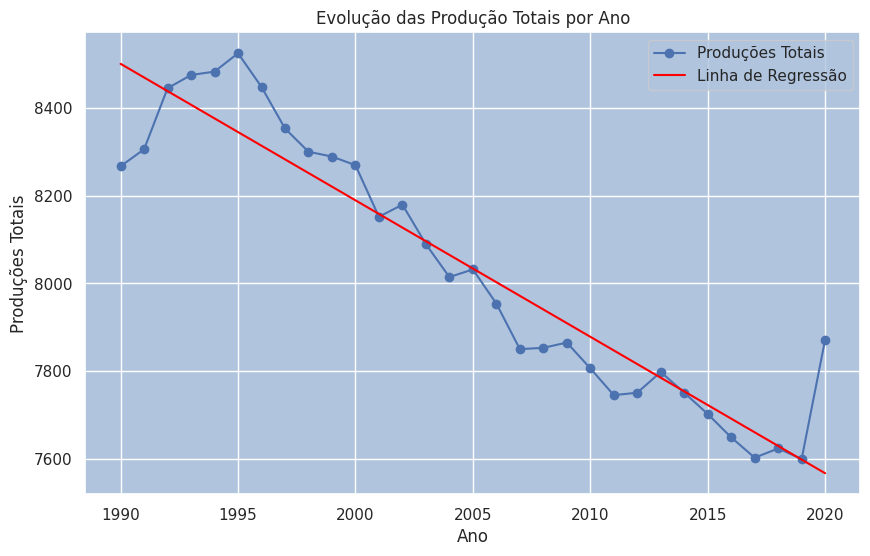

In [ ]:
total_energia_renovavel = data_teste_reno.loc['Total']  # Seleciona a linha 'Total'

# Filtrando os valores de emissões apenas para os anos (colunas de 1990 a 2020, removendo 'Total Energia Renovavel')
total_renovavel_anos = total_energia_renovavel.drop('Total Energia Renovavel')

# Convertendo os anos (que são as colunas) para inteiros, se necessário
anos = total_renovavel_anos.index.astype(int)

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(anos, total_renovavel_anos.values, marker='o', label='Produções Totais')

X = np.array(anos).reshape(-1, 1)  # Convertendo anos para uma matriz 2D
X = sm.add_constant(X)  # Adicionando intercepto
y = total_renovavel_anos.values

model = sm.OLS(y, X).fit()

# Fazendo a previsão para todos os anos
predictions = model.predict(X)

# Plotando a linha de regressão
plt.plot(anos, predictions, color='red', label='Linha de Regressão')
# Configurando os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Produções Totais')
plt.title('Evolução das Produção Totais por Ano')

# Exibindo a legenda e o grid
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

In [ ]:
df_america_do_sul_reno = data_reno[data_reno['Country Name'].isin(paises_america_do_sul)]

df_outros_paises_reno = data_reno[~data_reno['Country Name'].isin(paises_america_do_sul)]

df_america_do_sul_reno.head(15)

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total Energia Renovavel
9,Argentina,8.6,8.4,9.0,9.7,10.0,10.2,8.6,9.7,9.6,...,8.6,8.9,9.8,9.4,9.4,10.4,10.5,10.7,9.8,267.5
28,Bolivia,37.0,38.1,36.9,36.9,35.2,33.2,32.4,32.0,30.6,...,17.4,16.0,15.0,14.2,13.6,14.3,14.3,13.5,16.9,655.7
29,Brazil,49.8,48.9,48.7,48.2,48.3,46.1,44.5,43.7,43.8,...,43.5,42.3,41.7,43.7,45.4,45.3,46.9,47.5,50.0,1270.0
39,Chile,34.0,37.3,38.6,35.8,34.8,34.2,32.2,30.0,29.8,...,30.3,30.2,27.0,25.1,24.6,24.1,25.5,25.3,26.7,838.1
45,Colombia,38.1,36.8,33.1,33.0,33.8,33.5,33.6,25.7,25.8,...,29.6,32.0,32.1,31.1,30.5,32.2,30.4,31.5,32.0,851.9
66,Ecuador,24.2,24.2,20.8,21.6,20.9,20.4,19.3,16.6,18.2,...,13.2,11.8,12.2,13.1,14.8,17.0,16.3,17.7,20.2,459.3
94,Guyana,55.1,41.6,43.2,43.1,32.3,31.0,29.0,27.4,27.6,...,28.7,26.9,24.0,25.0,21.3,22.1,16.8,11.3,12.0,802.7
186,Peru,39.4,39.9,37.3,37.1,35.9,33.3,31.7,31.7,39.4,...,30.8,28.4,28.6,27.4,27.2,27.6,27.9,27.1,31.6,943.6
195,Paraguay,78.5,79.2,75.7,72.6,69.9,70.2,70.8,69.5,67.4,...,63.4,62.5,62.5,60.5,62.5,60.1,59.2,60.1,61.5,1841.3
220,Suriname,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.8,17.6,12.8,11.6,11.1,15.5,18.3,14.9,14.6,416.5


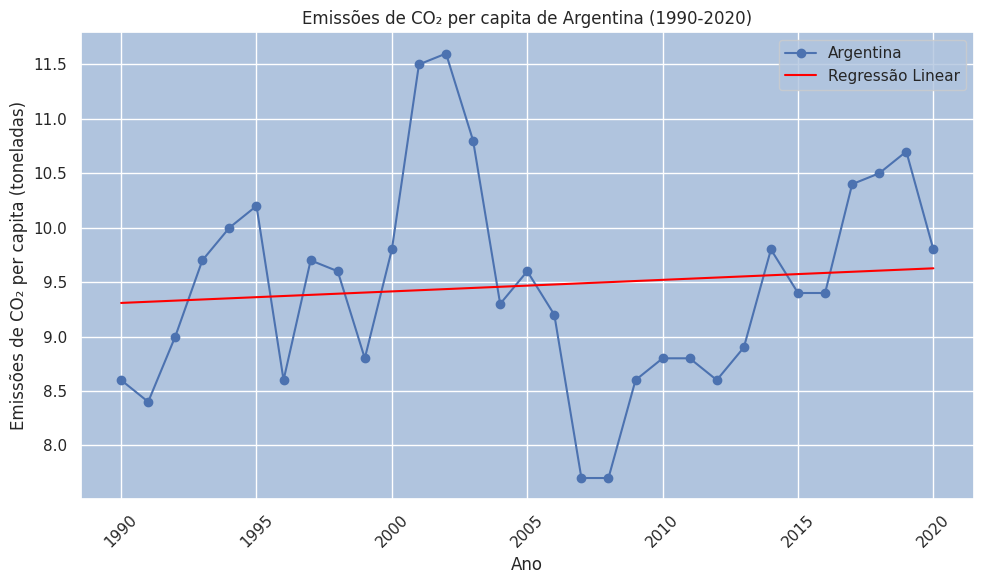

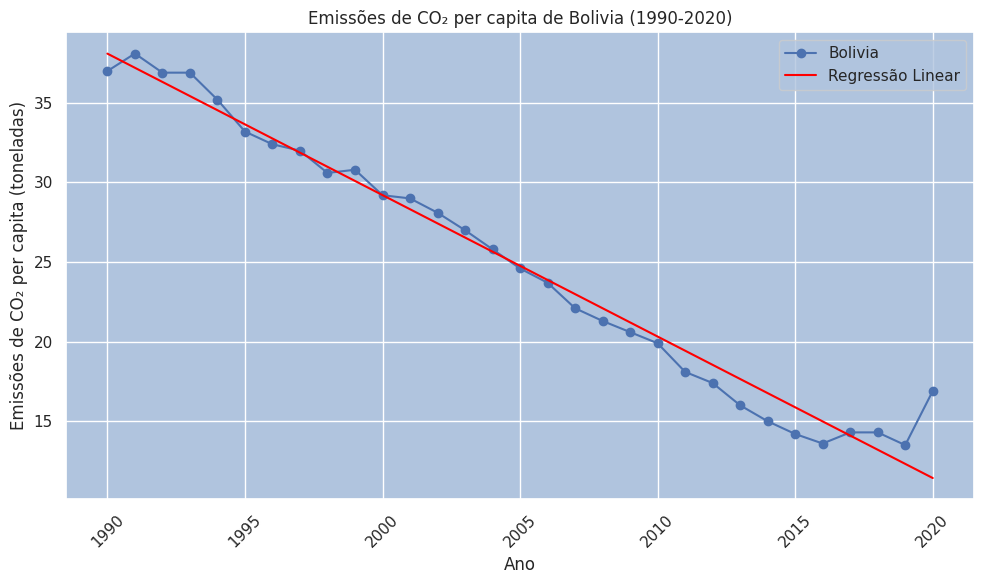

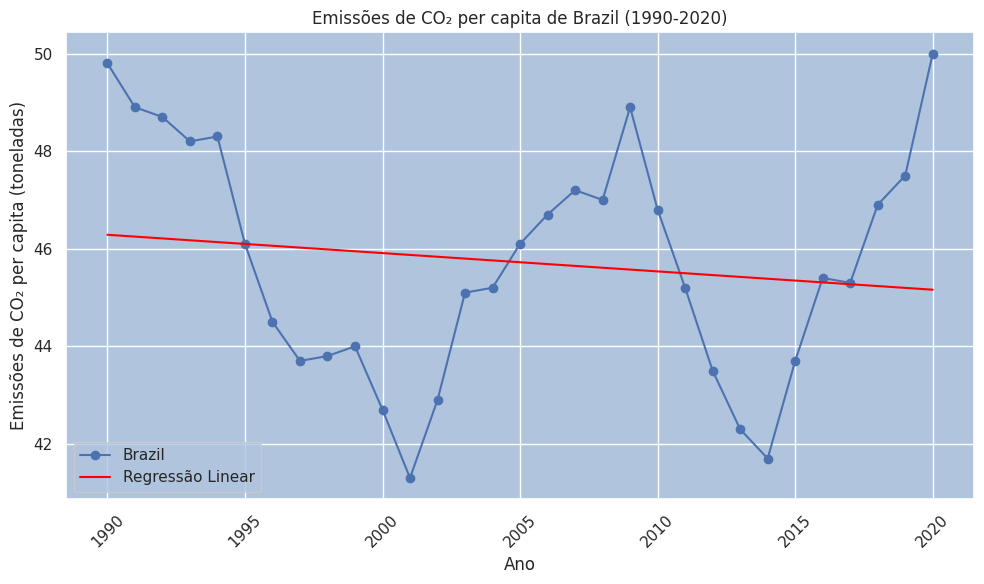

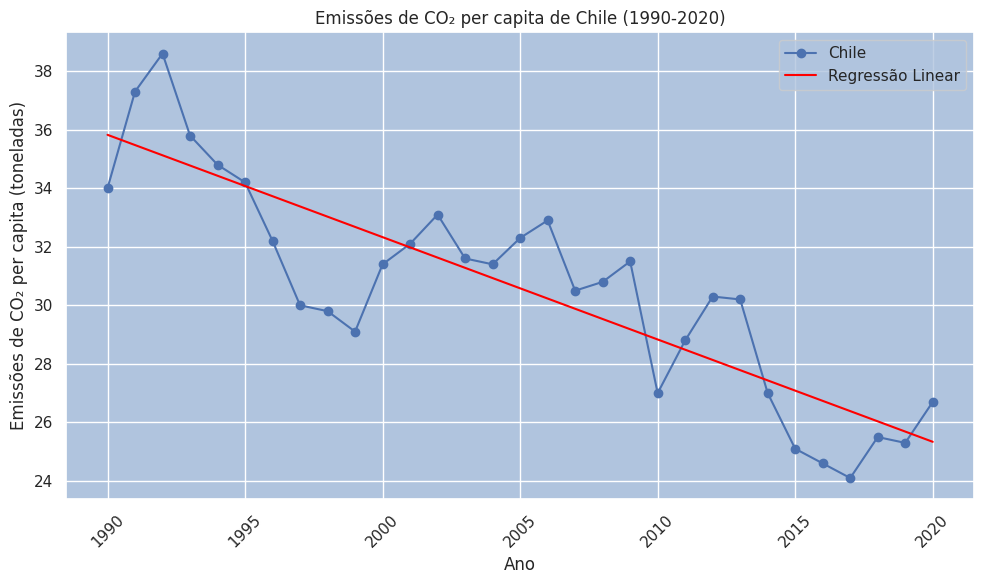

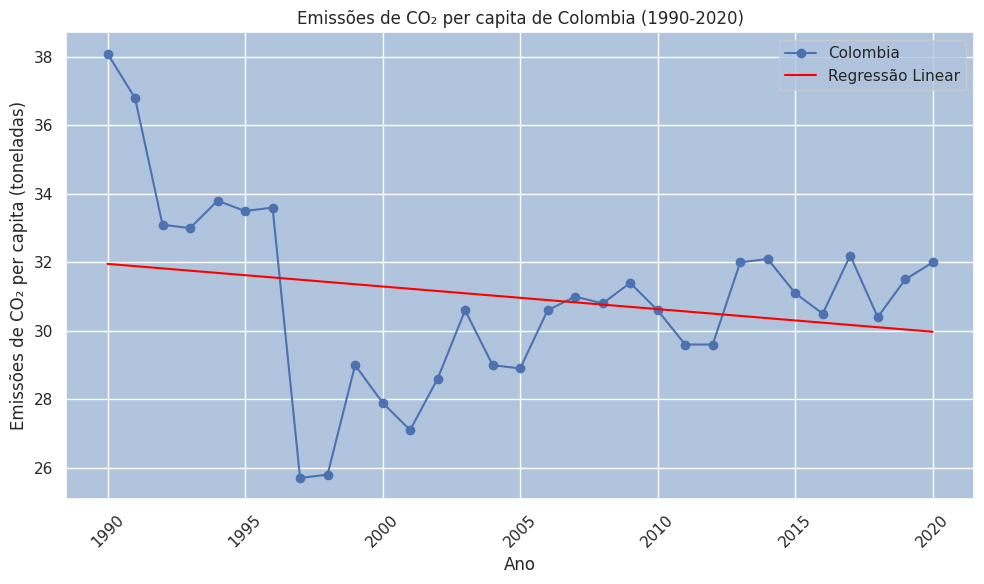

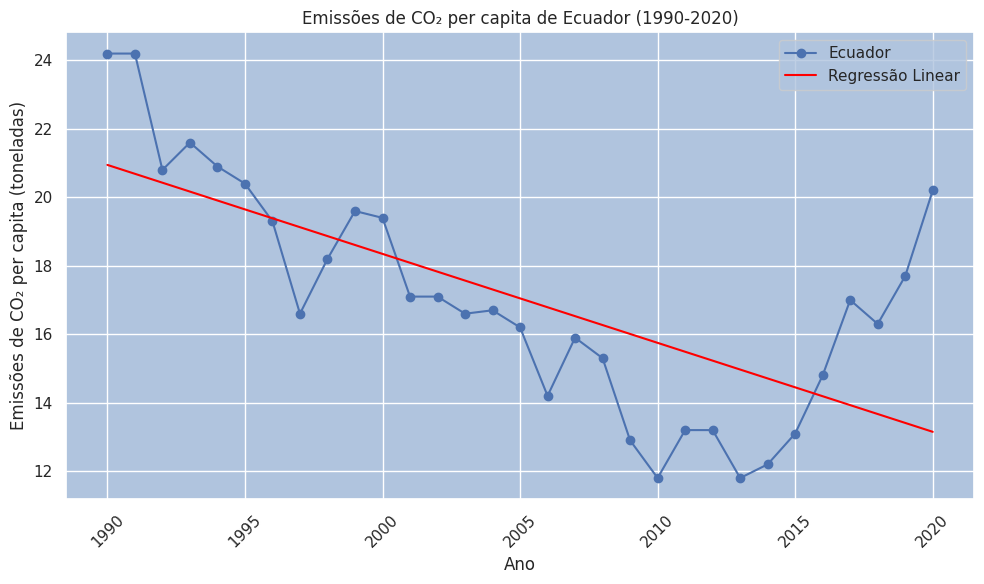

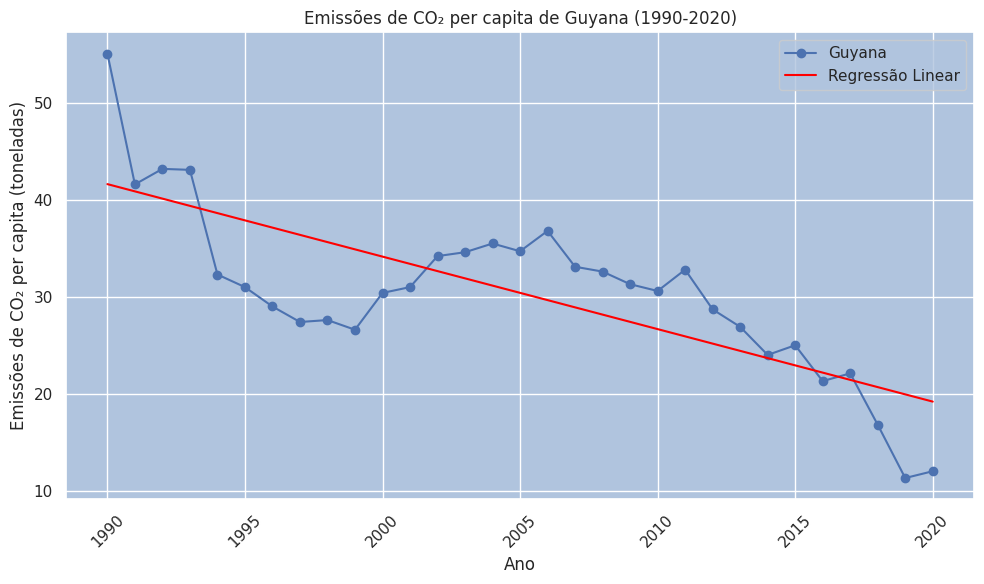

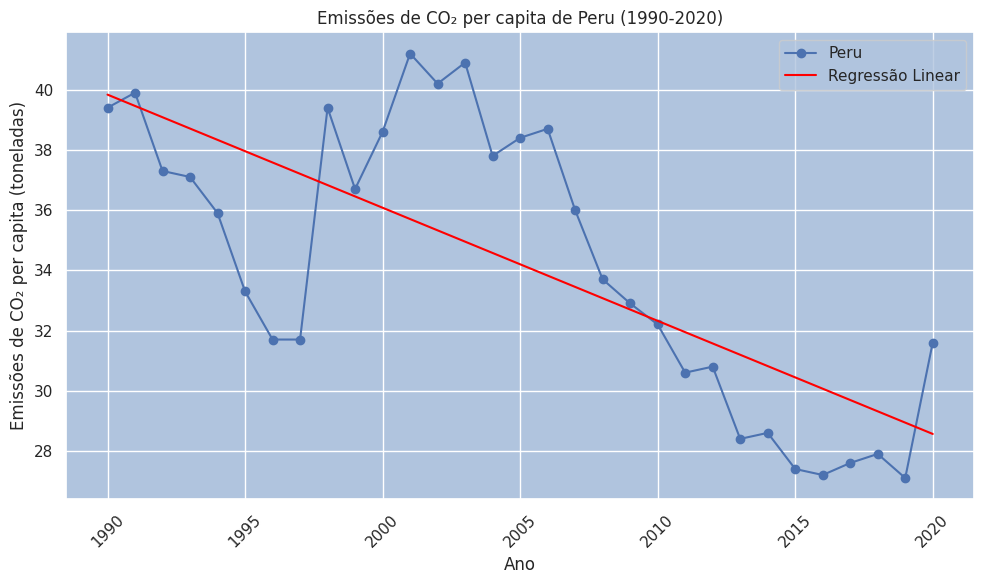

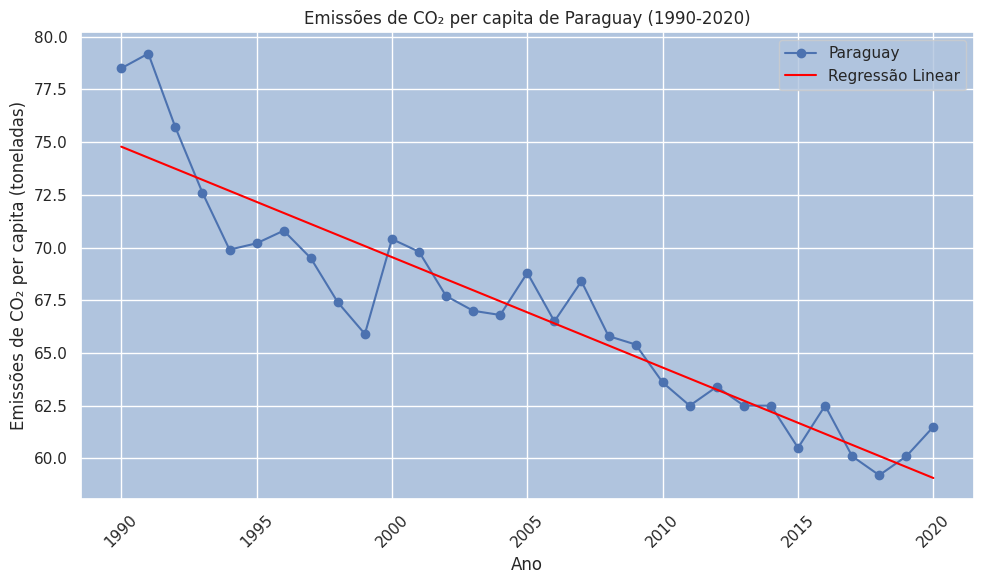

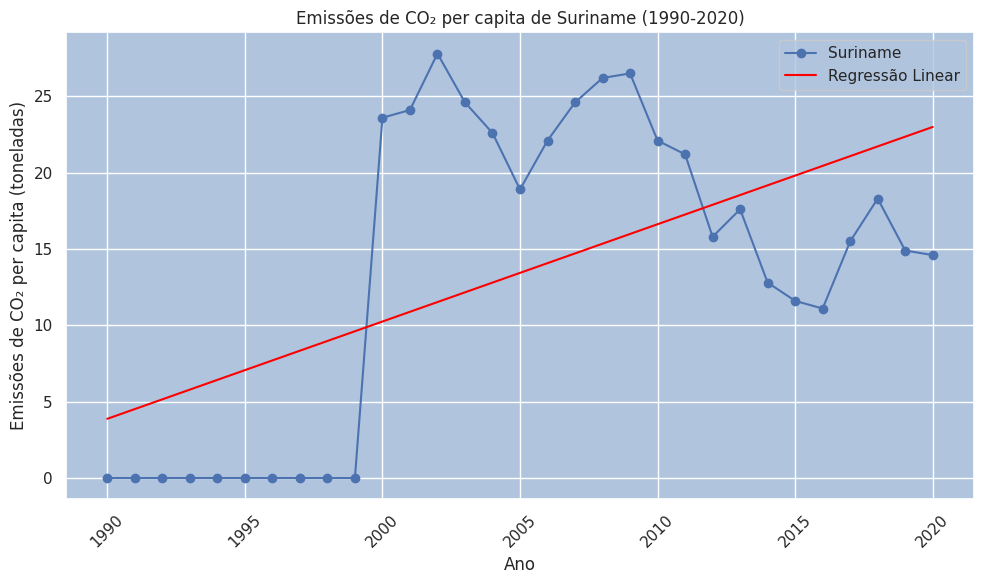

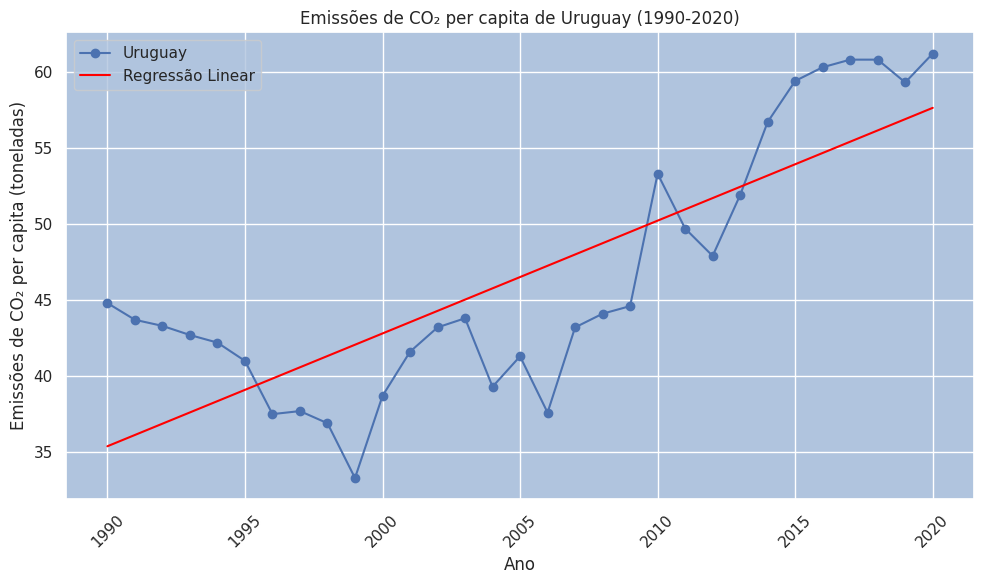

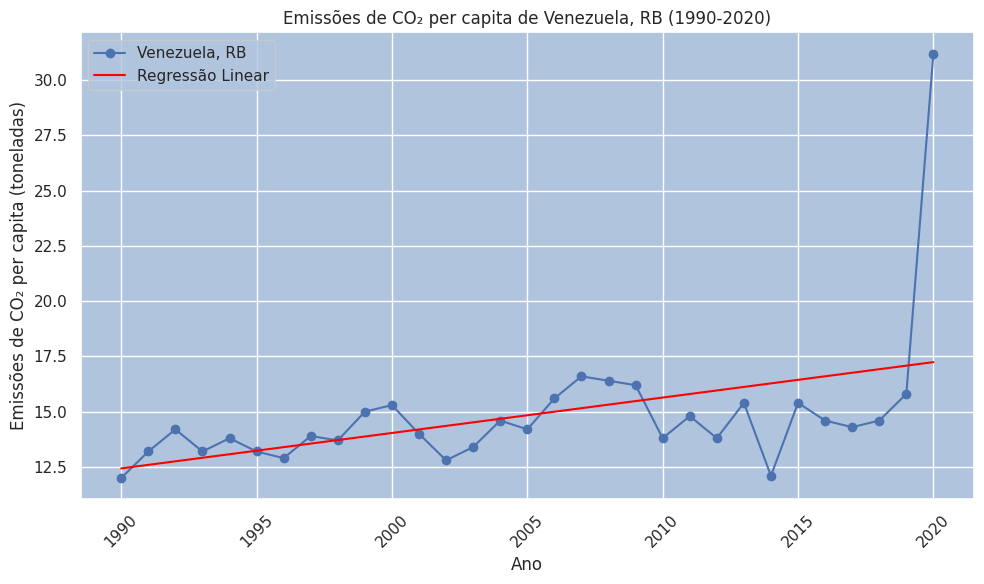

In [ ]:
df_america_do_sul_reno = df_america_do_sul_reno.drop('Total Energia Renovavel', axis=1)

def plot_emissoes_todos_paises_salvos(df_america_do_sul_reno):
    paises_reno = df_america_do_sul_reno['Country Name'].unique()

    for pais in paises_reno:
        df_pais_reno = df_america_do_sul_reno[df_america_do_sul_reno['Country Name'] == pais]

        anos = df_pais_reno.columns[1:]
        emissoes = df_pais_reno.iloc[0, 1:].values

        X = sm.add_constant(anos.astype(int))
        y = emissoes
        model = sm.OLS(y, X).fit()

        plt.figure(figsize=(10, 6))
        plt.plot(anos, emissoes, marker='o', color='b', label=pais)
        plt.plot(anos, model.fittedvalues, color='red', label='Regressão Linear')
        plt.title(f'Emissões de CO₂ per capita de {pais} (1990-2020)')
        plt.xlabel('Ano')
        plt.ylabel('Emissões de CO₂ per capita (toneladas)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        plt.savefig(f'emissoes_{pais}.png')

plot_emissoes_todos_paises_salvos(df_america_do_sul_reno)